###### Data Description :
    
    The Task is to develop an algorithm that predicts the number of wins for a given team based on several different indicaters of success.
    
    Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors
    (R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E)
    
    Output: Number of predicted wins (W)

###### Importing Libraries:

In [330]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

###### Acquiring the Data:

In [331]:
data=pd.read_csv("Baseball.csv")
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [332]:
data.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


By looking at the dataset above, we can see that all are continous data. 

Target variable W is also continous data.

We can choose Regression model for this dataset.

###### Analysing by describing data:

In [333]:
data.columns.values

array(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA',
       'ER', 'ERA', 'CG', 'SHO', 'SV', 'E'], dtype=object)

In [334]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


As we see above, there is no null values in the dataset. 

In [336]:
data.shape

(30, 17)

In [337]:
data

#Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, 
#Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


By looking at the data above, there is no categorical values. We have only continous values in all the columns.

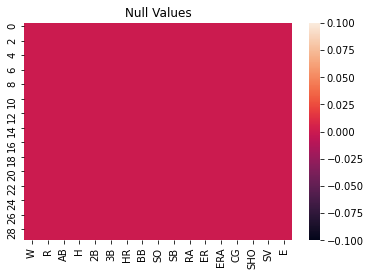

In [338]:
#Lets plot to visualize the null values
sns.heatmap(data.isnull())
plt.title("Null Values")
plt.show()

We can conclude that there is no Null Values in the dataset

###### Correlation Matrix :
Now Lets check for the correlation Matrix

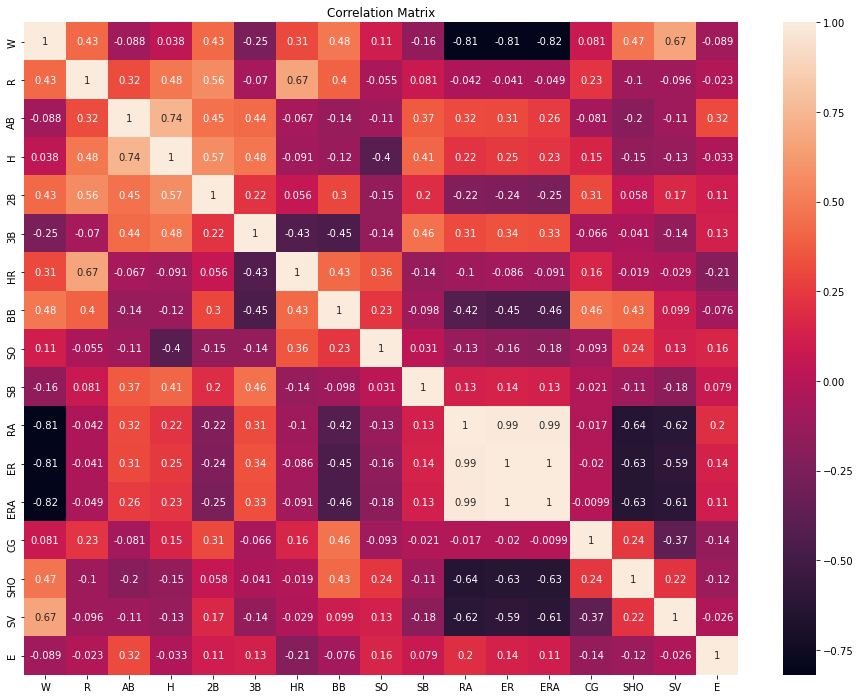

In [339]:
cor_mat=data.corr(method='pearson')
plt.figure(figsize=(16,12))
sns.heatmap(cor_mat, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [340]:
cor_mat["W"].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

###### Data distribution among all the columns:

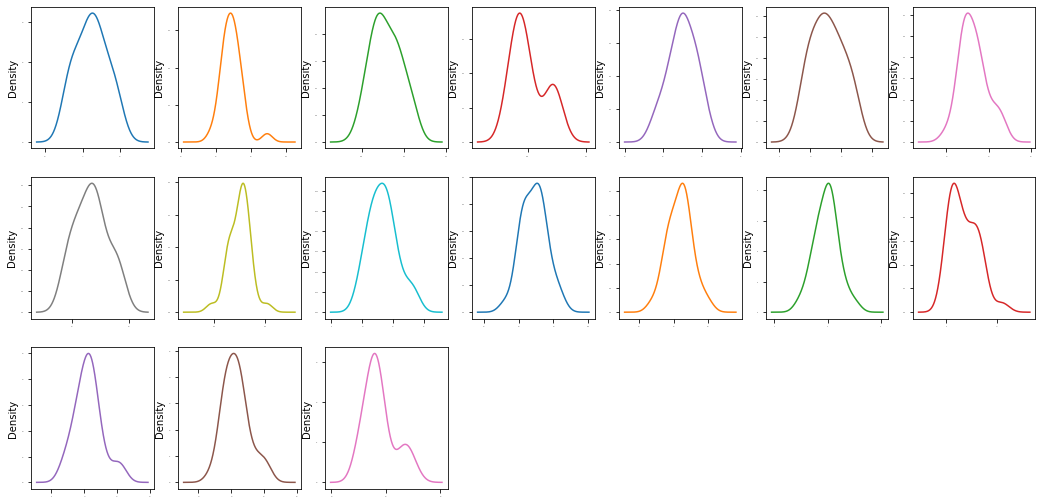

In [341]:
data.plot(kind='density', subplots=True,sharex=False,legend=False, fontsize=1,figsize=(18,12),layout=(4,7))
plt.show()

###### Independent variables Vs Dependant variable :

Lets visualize the correlation of each column with Target variable using scatter plot.
Lets check for the highly correlated columns first.

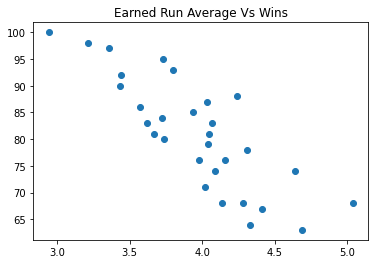

In [342]:
plt.scatter(data['ERA'],data['W'])
plt.title("Earned Run Average Vs Wins")
plt.show()

We can see a high -ve linear relationship between Earned Run Average Vs Wins.

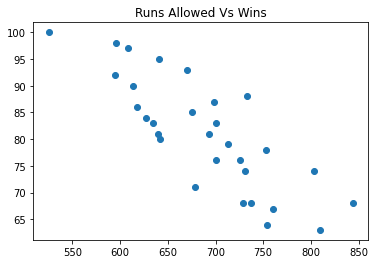

In [343]:
plt.scatter(data['RA'],data['W'])
plt.title("Runs Allowed Vs Wins")
plt.show()

We can see a high -ve linear relationship between Runs Allowed Vs Wins

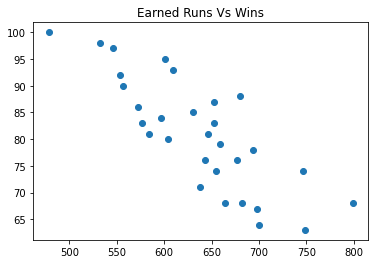

In [344]:
plt.scatter(data['ER'],data['W'])
plt.title("Earned Runs Vs Wins")
plt.show()

We can see a high -ve linear relationship between Earned Runs vs Wins

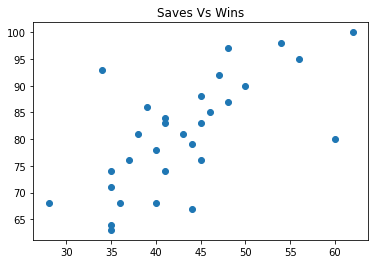

In [345]:
plt.scatter(data['SV'],data['W'])
plt.title("Saves Vs Wins")
plt.show()

We can see a high +ve linear relation between Saves and wins.

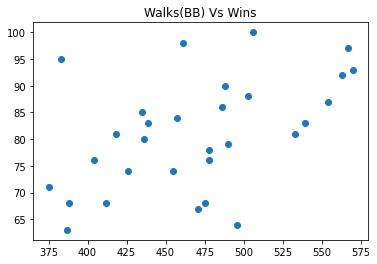

In [346]:
plt.scatter(data['BB'],data['W'])
plt.title("Walks(BB) Vs Wins")
plt.show()

There is a +ve linear relation between Walks and wins

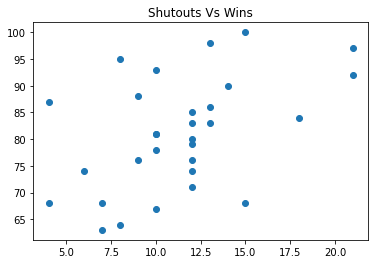

In [347]:
plt.scatter(data['SHO'],data['W'])
plt.title("Shutouts Vs Wins")
plt.show()

There is a +ve linear relation between Shutouts and wins

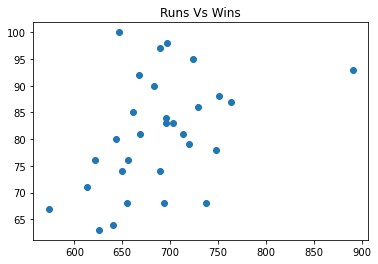

In [348]:
plt.scatter(data['R'],data['W'])
plt.title("Runs Vs Wins")
plt.show()

We can see a +ve linear relation between Runs and Wins

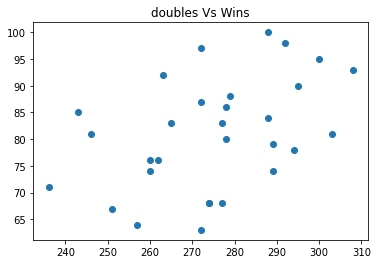

In [349]:
plt.scatter(data['2B'],data['W'])
plt.title("doubles Vs Wins")
plt.show()

Even though the datapoints are distributed, they are distributed in linear passion

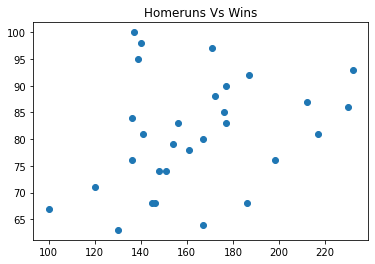

In [350]:
plt.scatter(data['HR'],data['W'])
plt.title("Homeruns Vs Wins")
plt.show()

Even though the datapoints are distributed, they are distributed in linear passion

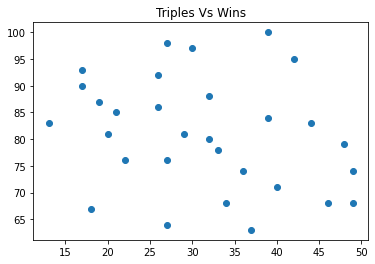

In [351]:
plt.scatter(data['3B'],data['W'])
plt.title("Triples Vs Wins")
plt.show()

The datapoints are distributed in -ve linear passion

In [407]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Lets split our data into feature set x and target set y.

In [352]:
x=data.drop('W', axis=1)
y=data["W"]

print(x.shape, y.shape)

(30, 16) (30,)


In [353]:
x.keys()

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E'],
      dtype='object')

###### Checking the Skewness:

In [354]:
x.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

There is very minimal skewness in some column of the data, so we can ignore it.

###### Checking for Outliers:
Lets check if we have outliers in our dataset

In [355]:
x.keys()

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E'],
      dtype='object')

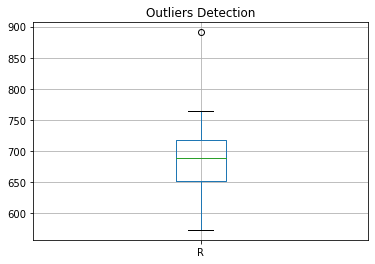

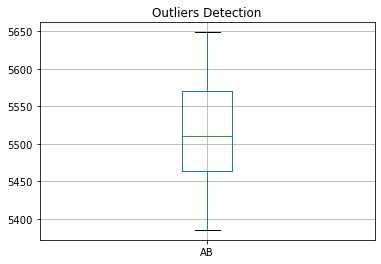

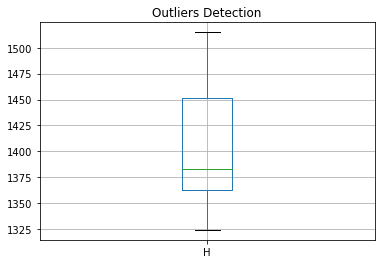

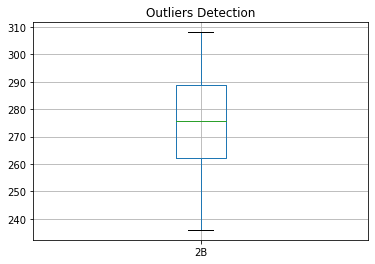

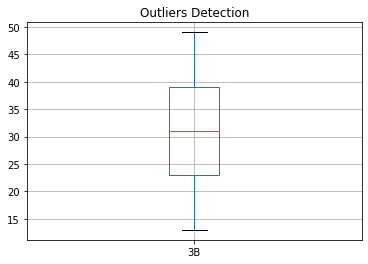

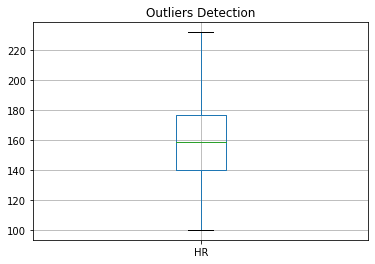

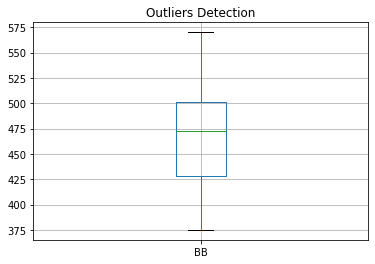

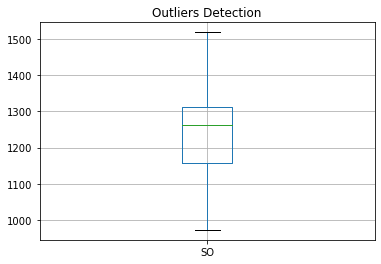

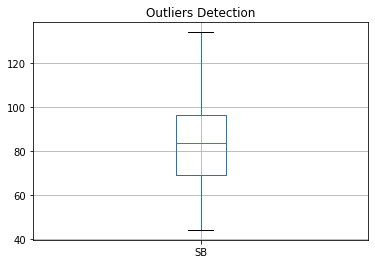

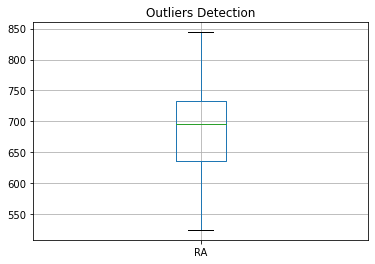

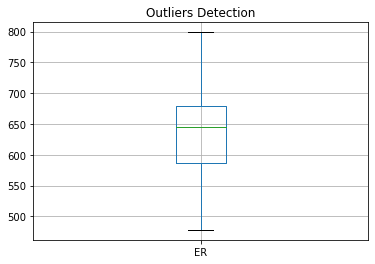

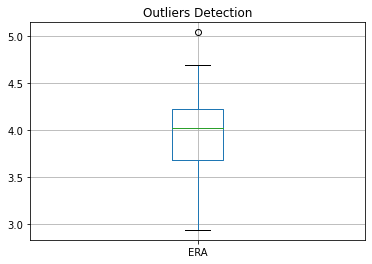

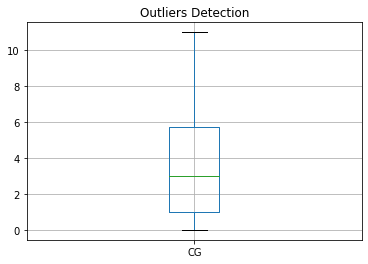

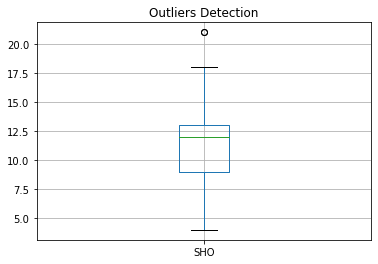

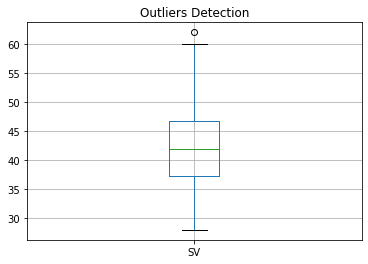

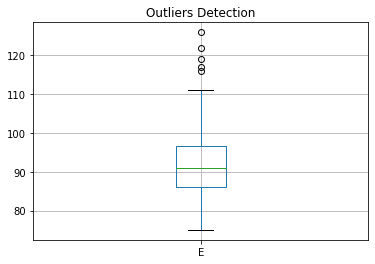

In [356]:
for i in x.keys():
    x.boxplot(i)
    plt.title("Outliers Detection")
    plt.show()
    

There is 1 outlier in R,ERA,SHO,SV and 5 outliers in E Columns data.

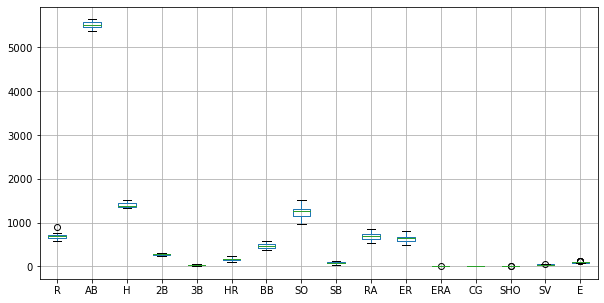

In [357]:
#Lets view all the columns together for outlier:
x.iloc[:,0:16].boxplot(figsize=(10,6))
plt.subplots_adjust(bottom=0.25)
plt.show()

As we have very less data, lets not remove the outliers from the dataset.

###### Treating Outlier:
    Lets replace the outliers with median values for R,ERA,SHO,SV and E

In [358]:
print(x['R'].quantile(.50))
print(x['R'].quantile(1))

689.0
891.0


C:\Users\ak38\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R', ylabel='Density'>

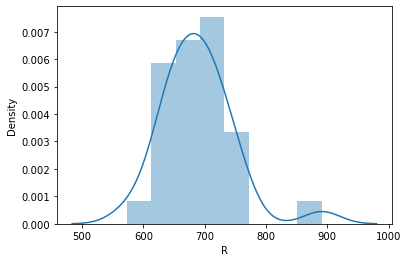

In [359]:
sns.distplot(x.R)

In [360]:
#Lets replace the outlier value 891 with median.
x["R"]=np.where(x["R"]>=891, x['R'].quantile(.50), x["R"] )

C:\Users\ak38\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R', ylabel='Density'>

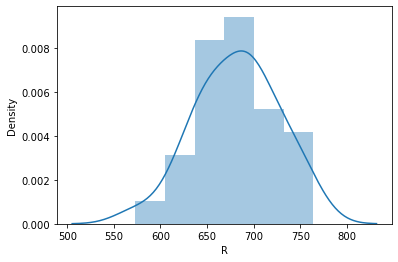

In [361]:
sns.distplot(x.R)

In [362]:
#Lets check in column ERA
print(x['ERA'].quantile(.50))
print(x['ERA'].quantile(1))

4.025
5.04


C:\Users\ak38\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ERA', ylabel='Density'>

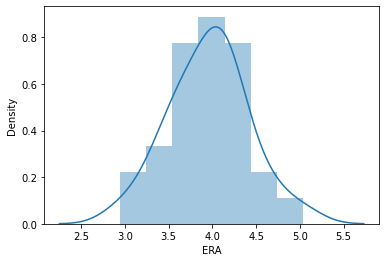

In [363]:
sns.distplot(x.ERA)

By looking at the graph above, the outlier can be ignored as the dataset contains nearer values.

In [364]:
#Lets check in column SHO
print(x['SHO'].quantile(.50))
print(x['SHO'].quantile(1))

12.0
21.0


C:\Users\ak38\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SHO', ylabel='Density'>

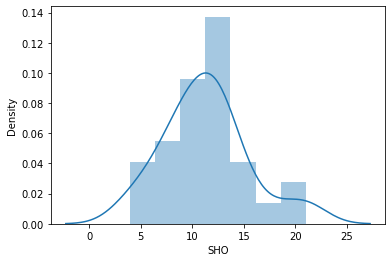

In [365]:
sns.distplot(x.SHO)

Here lets replace the outlier with median to remove the skewness in the data.

In [366]:
x["SHO"]=np.where(x["SHO"]>=21, x['SHO'].quantile(.50), x["SHO"] )

C:\Users\ak38\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SHO', ylabel='Density'>

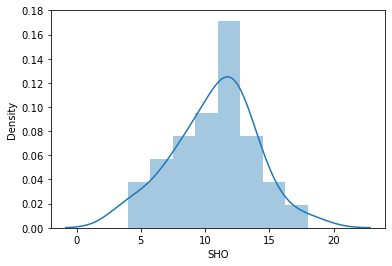

In [367]:
sns.distplot(x.SHO)

In [368]:
#Lets check in column SV
print(x["SV"].quantile(0.50))
print(x["SV"].quantile(1))

42.0
62.0


C:\Users\ak38\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SV', ylabel='Density'>

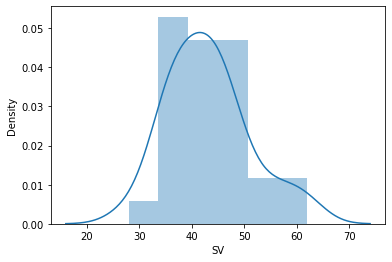

In [369]:
sns.distplot(x.SV)

In [370]:
x.SV

0     56
1     45
2     38
3     37
4     35
5     34
6     48
7     43
8     60
9     40
10    45
11    39
12    46
13    45
14    28
15    62
16    54
17    48
18    40
19    35
20    50
21    41
22    35
23    44
24    35
25    47
26    41
27    44
28    41
29    36
Name: SV, dtype: int64

Lets ignore the outlier as the outlier has nearer values in the dataset.

C:\Users\ak38\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


91.0
126.0


<AxesSubplot:xlabel='E', ylabel='Density'>

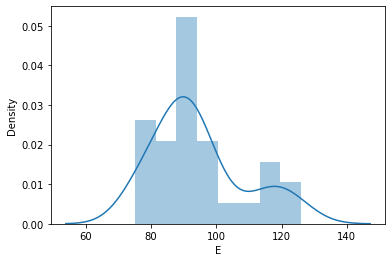

In [371]:
#Lets check in column E
print(x["E"].quantile(0.50))
print(x["E"].quantile(1.00))
sns.distplot(x.E)

C:\Users\ak38\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='E'>

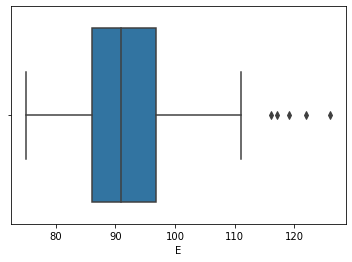

In [372]:
sns.boxplot(x.E)

In [373]:
x.E

0      88
1      86
2      79
3     101
4      86
5      88
6      93
7      77
8      95
9      97
10    119
11     85
12     93
13     94
14    126
15     96
16    122
17    111
18    116
19     90
20     88
21     90
22     77
23     90
24    117
25     75
26     78
27     86
28     92
29     95
Name: E, dtype: int64

Lets keep the data as it is for the column E outliers as the data points are relatively similar.

In [374]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724.0,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8.0,56,88
1,696.0,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12.0,45,86
2,669.0,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10.0,38,79
3,622.0,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9.0,37,101
4,689.0,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12.0,35,86


###### Scaling:
Now its time to scale the data to bring all the datapoints to one scaling standard to improve the performance of the model.

In [375]:
from sklearn.preprocessing import StandardScaler

SS=StandardScaler()

X=SS.fit_transform(x)
print(X.mean(),X.std())

1.2813824075882014e-16 1.0


In [376]:
x=pd.DataFrame(X)

In [377]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.969408,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.539806,-0.862044,1.671607,-0.461470
1,0.330739,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.539806,0.415058,0.249879,-0.607197
2,-0.285120,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,2.772641,-0.223493,-0.654856,-1.117242
3,-1.357171,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.300442,-0.542768,-0.784104,0.485758
4,0.171072,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.300442,0.415058,-1.042600,-0.607197


In [379]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

###### Train_Test_Split:
    Lets Split our data into train set and test set using train_test_split.

In [390]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=134)

In [391]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(24, 16) (24,) (6, 16) (6,)


###### Build, predict and evaluating the regression Model:

In [392]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

lr=LinearRegression()
knn=KNeighborsRegressor()
dtc=DecisionTreeRegressor()
svr=SVR()
rfr=RandomForestRegressor()

model = [lr,knn,dtc,svr,rfr]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=r2_score(y_test,pred)
    print('Accuracy Score of',m,'is :',acc)
    print("Mean absolute error: %.2f" % np.mean(np.absolute(pred - y_test)))
    print("Residual sum of squares (MSE): %.2f" % np.mean((pred - y_test) ** 2))
    print("\n")

Accuracy Score of LinearRegression() is : 0.9330605691048773
Mean absolute error: 1.95
Residual sum of squares (MSE): 4.65


Accuracy Score of KNeighborsRegressor() is : 0.39304278288684535
Mean absolute error: 5.57
Residual sum of squares (MSE): 42.17


Accuracy Score of DecisionTreeRegressor() is : -0.5401839264294281
Mean absolute error: 8.67
Residual sum of squares (MSE): 107.00


Accuracy Score of SVR() is : -0.06598444060308584
Mean absolute error: 7.51
Residual sum of squares (MSE): 74.06


Accuracy Score of RandomForestRegressor() is : -0.43292211115553725
Mean absolute error: 8.23
Residual sum of squares (MSE): 99.55




In [ ]:
The performance of the model is summerised below : 
    > Linear Regression Model, Test set MAE is 1.95 and r2 score is 93.3%, the performance is very good.
    > All other regression models are performing Worst.

###### Cross Validation :
As we have very small dataset, we can skip the cross validation.

###### Regularizarition:

In [400]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

R=Ridge()
L=Lasso()
EN=ElasticNet()
model = [R, L, EN]
alpha=0.0001

for m in model:
    m.fit(x_train,y_train)
    pred_m=m.predict(x_test)
    acc_m=r2_score(y_test,pred)
    print("R2 score of model ", m ,"is :", acc_m)

R2 score of model  Ridge() is : 0.9330605691048773
R2 score of model  Lasso() is : 0.9330605691048773
R2 score of model  ElasticNet() is : 0.9330605691048773


The performance of all the regularization models are 93.3%.

In [402]:
R.coef_

array([ 1.56285927, -0.27407181,  1.05503805, -0.30675908, -0.08914502,
        2.16168125,  0.10022875, -0.74586464,  0.78261571, -2.01426664,
       -2.9915024 , -3.49576177,  0.23647298, -1.05861729,  1.97399415,
        0.17150682])

In [403]:
L.coef_

array([ 1.5436698 ,  0.        ,  0.20144646,  0.        , -0.        ,
        1.03119437,  0.        , -0.        ,  0.        , -1.81146709,
       -0.        , -5.34565919,  0.        , -0.        ,  1.26338019,
       -0.        ])

In [404]:
EN.coef_

array([ 1.15039704,  0.        ,  0.41744605,  0.48440426, -0.        ,
        1.03515259,  0.55415407, -0.        ,  0.        , -1.98478407,
       -1.95828803, -2.0595947 ,  0.        , -0.        ,  1.61984449,
       -0.08335948])

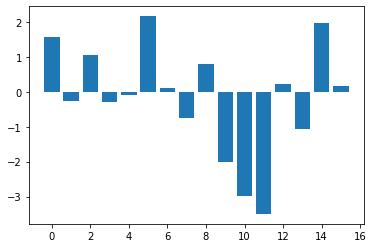

In [409]:
plt.bar(x.columns,R.coef_)
plt.show()

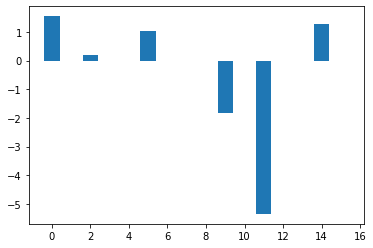

In [410]:
plt.bar(x.columns,L.coef_)
plt.show()

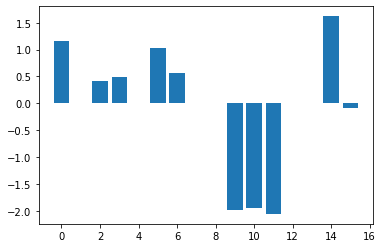

In [411]:
plt.bar(x.columns,EN.coef_)
plt.show()

In Lasso and ElasticNet models, we can see that the features that are not informative, the coefficients are brought to zero so as to improve the performance of the model.

We are getting a model accuracy of 93.30% which is good.

###### Saving the Model:

In [430]:
import joblib
file_name='Baseball.obj'
joblib.dump(EN,open(file_name,'wb'))

###### Conclusion:

In [431]:
a=np.array(y_test)
b=np.array(pred)
compare=pd.DataFrame({'Original':a, 'Predicted':b},index=range(len(a)))
compare

,Original,Predicted
0,74,72.253034
1,88,84.200687
2,64,64.862163
3,78,79.972221
4,86,87.992565
5,71,69.653663
